In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [2]:
img_array=cv2.imread( "C:/Users/akash.kale/Documents/test/0/PrivateTest_88305.jpg")

In [3]:
datadirectory="C:/Users/akash.kale/Documents/Train/"

In [4]:
Classes=["0","1","2","3","4","5","6"]

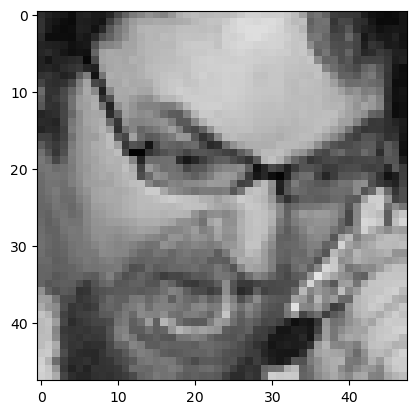

In [5]:
for category in Classes:
    path=os.path.join(datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
        
        

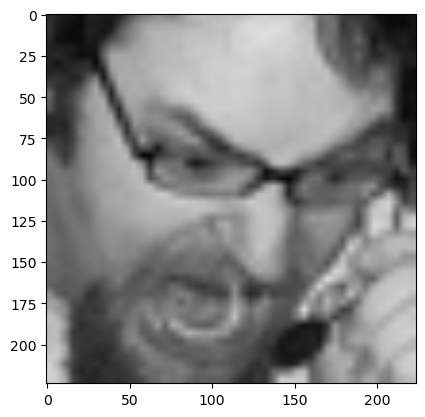

In [6]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
training_Data=[]
def create_training_Data():
    for category in Classes:
        path=os.path.join(datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

7178


In [10]:
import random
random.shuffle(training_Data)

In [15]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)


In [16]:
X.shape

(7178, 224, 224, 3)

In [17]:
X=X/255.0;

In [18]:
Y=np.array(y)

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.mobilenet_v2 import MobileNetV2


In [23]:
model=tf.keras.applications.MobileNetV2()


14536120/14536120 [==============================] - 4s 0us/step


In [24]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [25]:
base_input=model.layers[0].input

In [26]:
base_output=model.layers[-2].output

In [28]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [29]:
final_output=layers.Dense(128)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)

In [30]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [31]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [32]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 14, 14, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_depthwise_relu (ReLU)  (None, 14, 14, 384)  0           ['block_7_depthwise_BN[0][0]']   
                                                                                                  
 block_7_p

                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 14, 14, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 14, 14, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_depthwise (DepthwiseC  (None, 14, 14, 576)  5184       ['block_11_expand_relu[0][0]']   
 onv2D)                                                                                           
          

                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 7, 7, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 7, 7, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
                                                                                                  
 block_15_expand (Conv2D)       (None, 7, 7, 960)    153600      ['block_14_add[0][0]']           
          

In [44]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [46]:
new_model.fit(X,Y,epochs=9)

Epoch 1/9
225/225 [==============================] - 302s 1s/step - loss: 0.2141 - accuracy: 0.9334
Epoch 2/9
225/225 [==============================] - 293s 1s/step - loss: 0.1503 - accuracy: 0.9485
Epoch 3/9
225/225 [==============================] - 293s 1s/step - loss: 0.1699 - accuracy: 0.9422
Epoch 4/9
225/225 [==============================] - 317s 1s/step - loss: 0.0954 - accuracy: 0.9673
Epoch 5/9
225/225 [==============================] - 321s 1s/step - loss: 0.1115 - accuracy: 0.9629
Epoch 6/9
225/225 [==============================] - 319s 1s/step - loss: 0.1102 - accuracy: 0.9624
Epoch 7/9
225/225 [==============================] - 285s 1s/step - loss: 0.1217 - accuracy: 0.9576
Epoch 8/9
225/225 [==============================] - 284s 1s/step - loss: 0.1223 - accuracy: 0.9602
Epoch 9/9
225/225 [==============================] - 288s 1s/step - loss: 0.0785 - accuracy: 0.9749


In [48]:
new_model=model.save('Final_model_95p07.h5')

In [51]:
new_model=tf.keras.models.load_model('Final_model_95p07.h5')

In [52]:
frame=cv2.imread("happyboy.jpg")

In [53]:
frame.shape

(900, 600, 3)

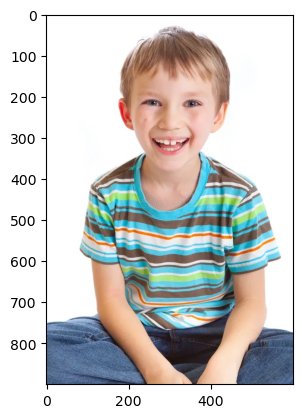

In [55]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [56]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [57]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [58]:
gray.shape

(900, 600)

In [64]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

for x, y, w, h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (225, 0, 0), 2)

    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]


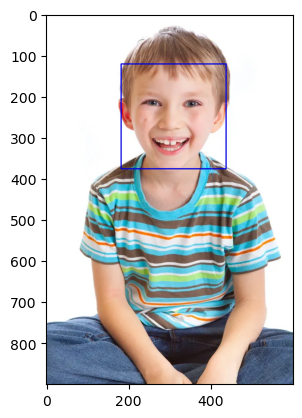

In [66]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

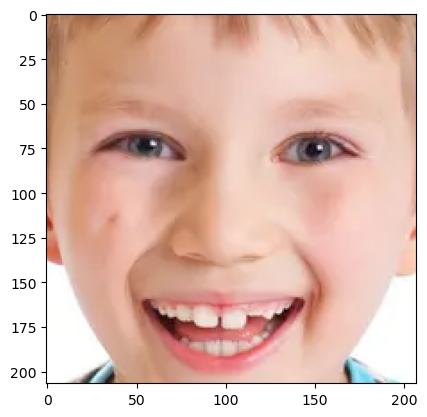

In [67]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [68]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/225.0

In [69]:
Prediction=new_model.predict(final_image)

1/1 [==============================] - 1s 1s/step


In [78]:
Prediction[0]

array([3.38504760e-05, 4.03574813e-05, 3.30297116e-05, 1.04549894e-04,
       1.26047807e-05, 2.77389313e-06, 1.00137433e-04, 2.43838513e-04,
       9.67215237e-05, 1.29088527e-03, 1.32040109e-03, 1.01887225e-03,
       8.92831013e-04, 1.42303563e-03, 2.37219594e-03, 4.54306683e-05,
       2.28551100e-04, 5.67172747e-03, 1.90325803e-03, 5.86598995e-04,
       4.44517573e-05, 3.71231651e-03, 7.30161337e-05, 1.07686064e-04,
       5.65794623e-03, 2.24688352e-04, 2.77434447e-04, 2.24895863e-04,
       1.24441984e-03, 4.06207866e-04, 3.32035095e-04, 4.17245465e-04,
       1.72654877e-03, 5.47623349e-05, 3.25982517e-04, 5.39279790e-05,
       1.77089838e-04, 5.42195514e-04, 3.22315173e-04, 3.62000246e-05,
       1.99836819e-03, 3.38157290e-04, 3.25911009e-04, 1.81462383e-03,
       1.14806644e-04, 9.96108065e-05, 8.34299193e-04, 1.02580921e-03,
       7.14296111e-05, 1.22531739e-04, 3.06648217e-05, 1.18128082e-04,
       4.02313417e-05, 2.94827070e-04, 3.37097939e-04, 2.89962900e-05,
      

In [73]:
np.argmax(Prediction)

773